### 1. 课题背景
天气原因和飞机故障等，都有可能导致相关机场出现大面积航班延误的情况。辅助人工决策的航班调整系统处理时间较长，不能满足对运行的快速响应，为了缩短航班计划恢复时间，提出了航班自动恢复系统的建设需求。该课题希望实现航班自动恢复系统的核心算法。当遇到恶劣天气或飞机故障时，该算法能够在满足各种实际约束条件的前提下，自动对航班进行快速调整，快速恢复航班计划并使公司运营成本达到最低。

### 2. 问题描述
已知厦门航空公司未来几天的全部航班计划，以及航班运行的各种约束条件，假设当前**由于恶劣天气或飞机故障，导致某些航班不能正常运行**，需要对相关航班进行调整，使得受影响的航班旅客尽快疏散，**未受影响的航班运行受影响最小，而且恢复的综合成本**尽可能低。

### 3. 调整方法
1. 取消航班。

2. 换飞机：改变航班绑定的飞机。可以换成同一机型的其他飞机，或者换成不同机型的飞机（目标函数中加惩罚，参考“6. 目标函数”）。

3. 调整时间：修改航班起飞时间（提前或延后）。航班时刻提前与延误规则详见“8. 航班调整规则”

5. 调机：某飞机不搭乘旅客空飞到其他机场。调机规则详见“8. 航班调整规则”。

6. *旅客签转：将取消航班的旅客、联程航班拉直损失的旅客、换飞机或机型变化损失的旅客、中转失败的旅客、超售的旅客，签转到后面航班空余的座位中，旅客签转规则详见“8. 航班调整规则”。*(当前不考虑)

### 4.约束条件
1. 航站衔接：同一飞机上一航班落地机场和下一航班起飞机场必须一致。
2. *航线-飞机限制：某航线不能由某飞机来飞。*（当前不考虑）
3. 飞机过站时间：飞机在任何机场降落后，至少停留50分钟才能起飞。*原始数据中如果一个飞机的两个连续航班间隔小于50分钟，那么进行航班调整后，如果这两个航班仍使用同一架飞机（两个航班都不换飞机，或同时换成另一架飞机）并连续，那么间隔时间只要不小于原间隔时间即可。（当前不考虑小于50分钟情况）*
4. 联程航班：表6航班表中，日期和航班号都相同的两条记录是联程航班。联程航班的调整限制参考“8. 航班调整规则”的说明。
5. 台风场景：台风期间，受影响的机场会对经过的飞机起飞、降落或停机产生限制。
6. 边界调整：**每架飞机最早（不是某一天最早，是所给数据中最早）起飞的机场不能改变。**
7. 旅客中转时间：旅客从某一航班中转至另一航班需要满足最小中转时间。

### 5. 目标函数
目标函数值 = p1*调机空飞航班数 + p2*取消航班数 + p3*机型发生变化的航班数 + p4*换飞机数量 + p6*航班总延误时间（小时）+ p8*取消旅客人数 +p9*延迟旅客人数 +p10*签转延误旅客人数。
**取消、机型变化、延误或者提前时需要考虑重要系数**

#### 参数设置为：
（1）p1：调机参数

         p1 = 5000

（2）p2：取消航班参数

         p2 = 1200

（3）p3：机型变化参数

         机型总共有四种，机型两两之间发生变化，参数会相应地变化，p3 = 基础分*系数
         ![%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202018-04-05%20%E4%B8%8B%E5%8D%884.32.03.png](attachment:%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202018-04-05%20%E4%B8%8B%E5%8D%884.32.03.png)
         
（4）p4：换飞机参数

          p4 =15
          
（5）p6：航班延误时间参数

          p6 =100
          
（6）p8：旅客行程取消参数

          p8 = 4

（7）p9：旅客行程延误参数

          旅客行程延误参数采用阶梯方式，根据不同延误时间段选取不同延误分值，详见下表：

          表4 旅客行程延误参数
          ![%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202018-04-05%20%E4%B8%8B%E5%8D%884.38.59.png](attachment:%E5%B1%8F%E5%B9%95%E5%BF%AB%E7%85%A7%202018-04-05%20%E4%B8%8B%E5%8D%884.38.59.png)
       
（8）p10：旅客签转延误参数   
           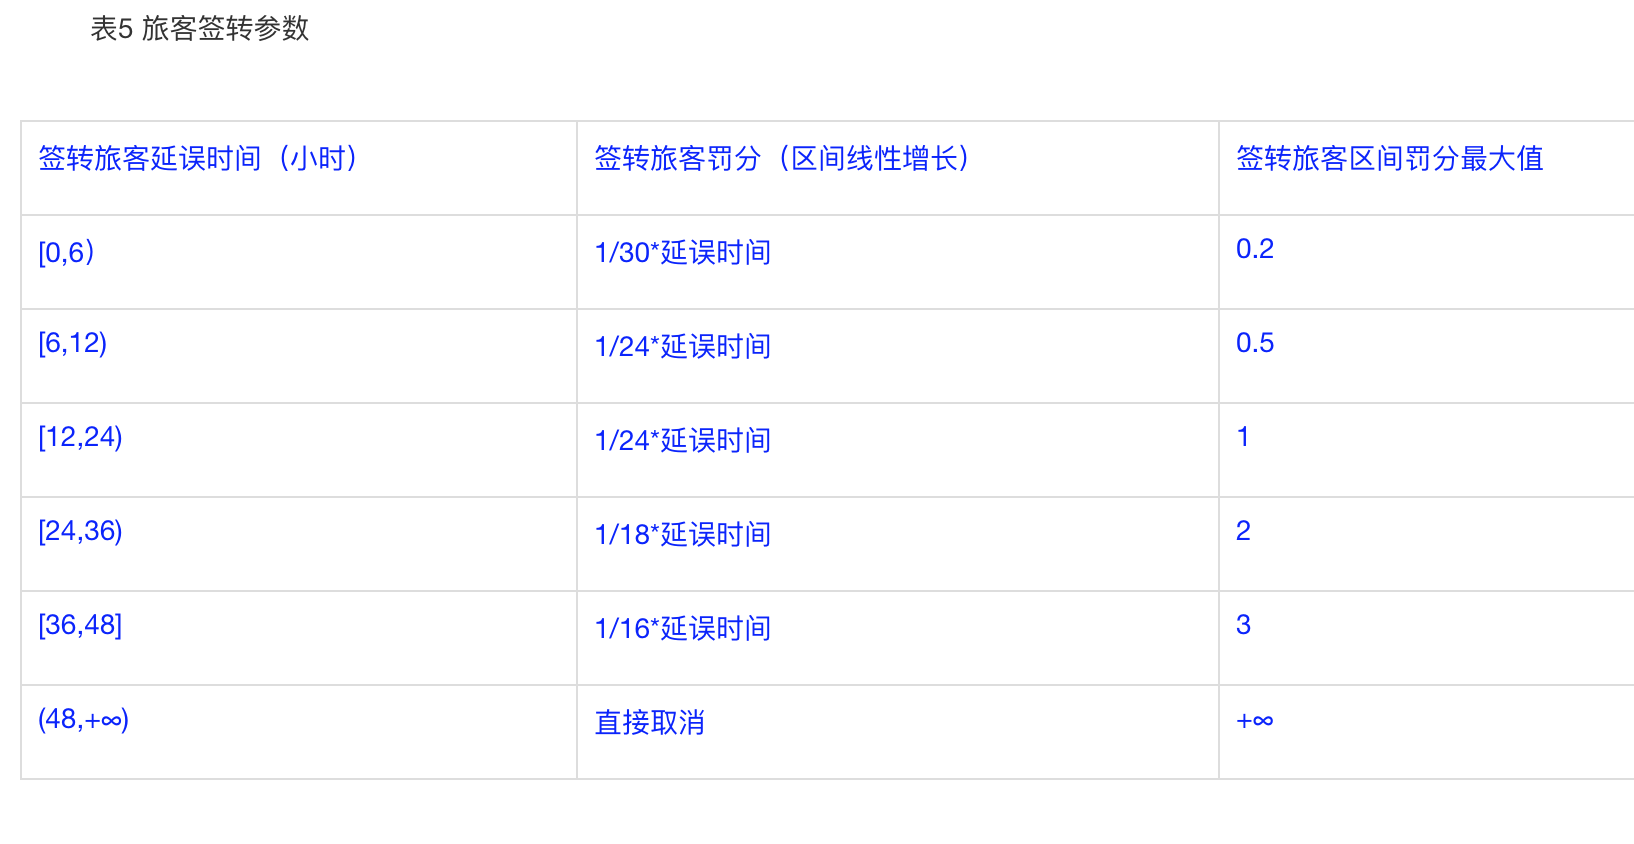

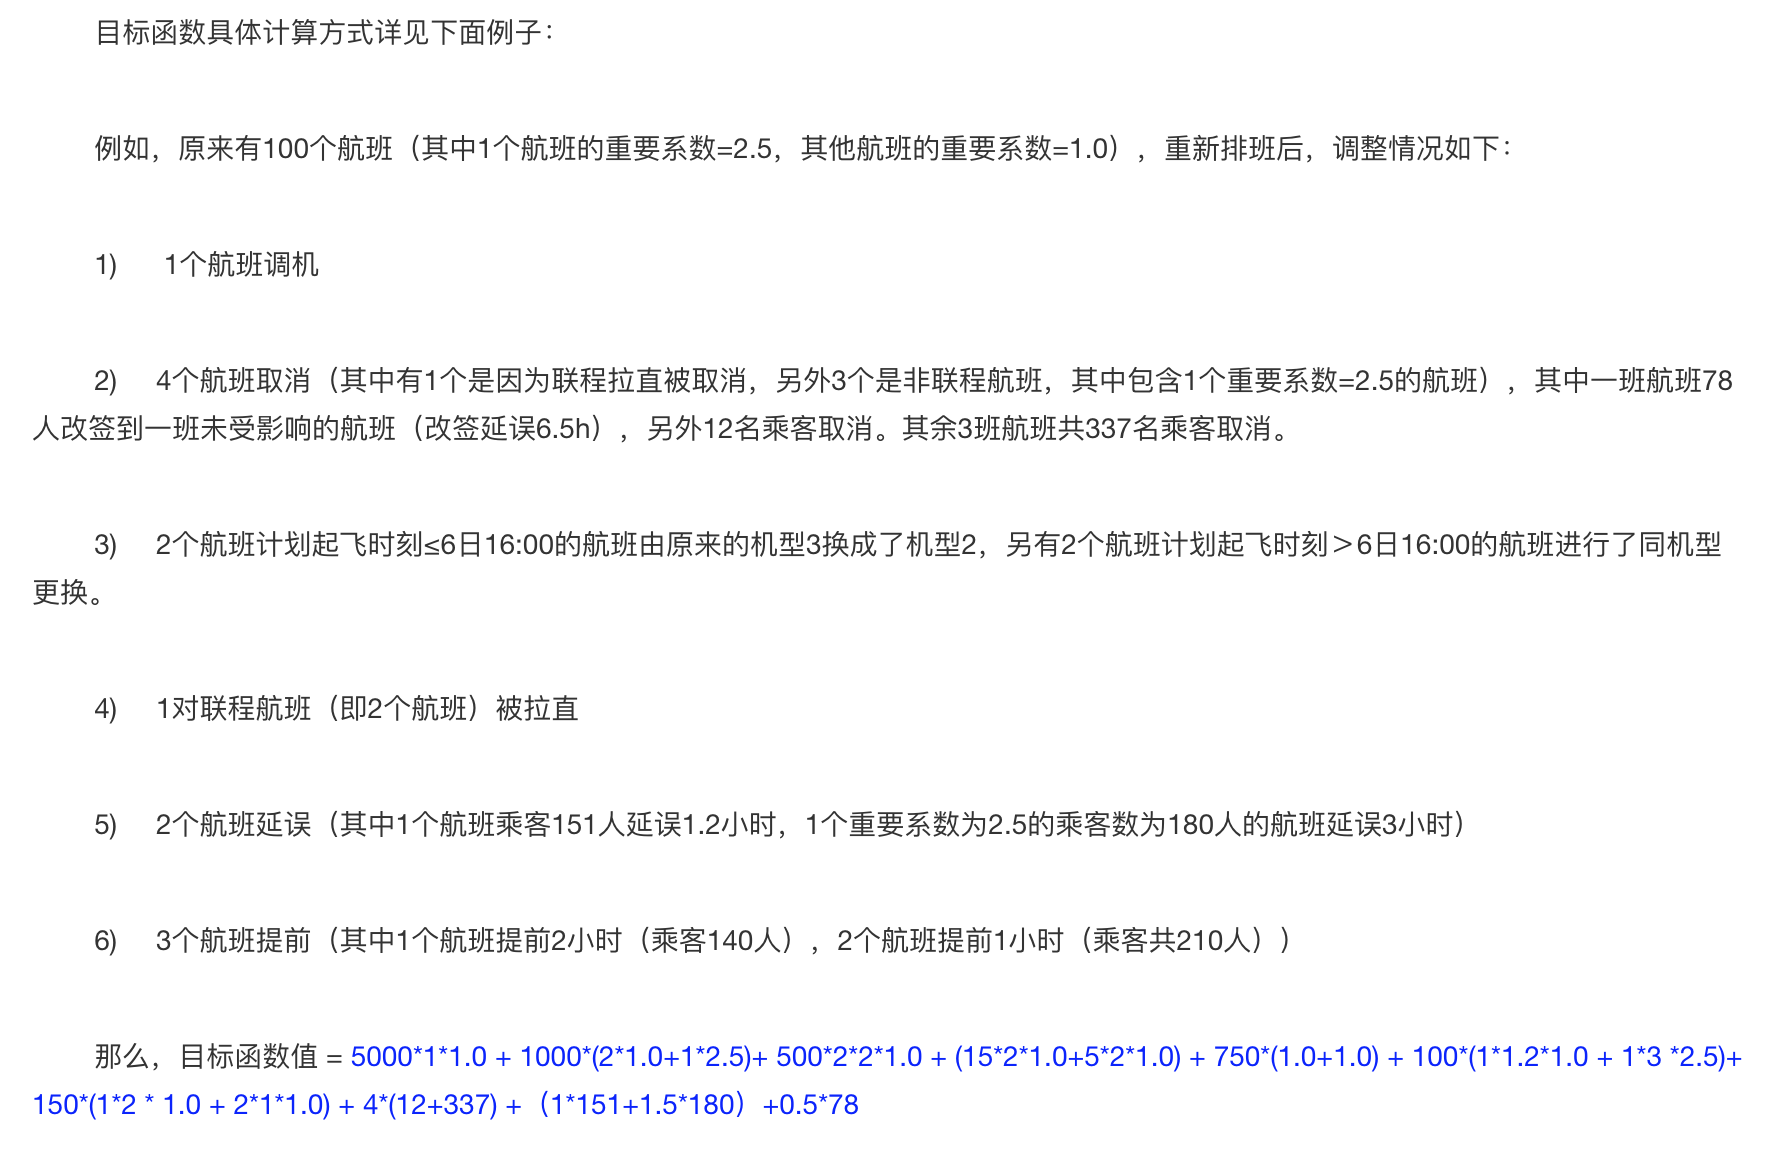

8.4.  调机

        调机的限定条件是：

        1) 调机必须使用在“表6 航班表”中出现的飞机。

        2) 只有国内航班（起飞机场和降落机场都是国内机场）允许调机。

        3) 调机时间调整：例如飞机从机场A调机空飞到机场B，飞行时间参考“表10 飞行时间表”。如果表10中查不到A->B的飞行时间，则不允许调机。

        4) 调机的航班，需要新增航班id来表示，从9001开始依次加1，分别是9001，9002，….

        5) 调机航班不能签转旅客。

cost of delay: 
$Total\ cost=C_a+C_d+C_c+C_T+C_p$

$C_a = \sum_{f\in F} (1-x_{f})*P_1*\gamma_f$

$C_a = \sum_{f\in F} x_{f}*P_1$

$C_d=\sum_{f\in F} T_{d_f}*P_2*\gamma_f$

$C_d=\sum_{f\in F} T_{d_f}*P_2$

$C_c=\sum_{f\in F} z_{f}*P_3*\gamma_f$

$C_c=\sum_{f\in F} z_{f}*P_3$

$C_t=\sum_{f\in F} w_{f}*P_4*\gamma_f$

$C_p=\sum_{f\in F} y_f*T_{d_f}*NP_f*P_5$

$+\sum_{f\in F} z_f*NP_f*P_6$

$+\sum_{f\in F} (y_f+z_f)*CP_f*P_6$

$P_{path_k}=\rho_k/\sum_i{\rho_i}$

$ \Delta\rho=1/Total\ cost$

$new\ \rho_k=\rho_k*\mu+\Delta\rho$

$\mu$

$Total\ cost=\sum_{f\in F} x_{f}*P_1$

$+\sum_{f\in F} T_{d_f}*P_2$

$+\sum_{f\in F} z_{f}*P_3$

$+\sum_{f\in F} y_f*T_{d_f}*NP_f*P_5$

$+\sum_{f\in F} z_f*NP_f*P_6$

$+\sum_{f\in F} (y_f+z_f)*CP_f*P_6$

$Flying\ time=(14:00 - departure\ time)*2$ 